In [10]:
import networkx as nx
import community as community_louvain
from sklearn.metrics import silhouette_score
from node2vec import Node2Vec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
G = nx.read_edgelist("graph.net", create_using=nx.Graph(), nodetype=int)

In [12]:
# Remove selfloops
G.remove_edges_from(nx.selfloop_edges(G))

In [13]:
cc = list(nx.connected_components(G))

In [14]:
# 5. Extract connected components
components = list(nx.connected_components(G))

# 6. Subgraph extraction
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
# 7. Graph conversion
adjacency_matrix = nx.to_numpy_array(subgraph)

In [40]:
# 8. Feature extraction
node_degrees = dict(subgraph.degree())
clustering_coefficients = nx.clustering(subgraph)

In [41]:
print('clustering_coefficients', clustering_coefficients)

clustering_coefficients {388: 0, 1994: 0.10714285714285714, 1084: 0.06666666666666667, 1239: 0.03508771929824561, 628: 0.18681318681318682, 809: 0.2545454545454545, 1811: 0.1794871794871795, 641: 0, 218: 0.2727272727272727, 434: 0.05263157894736842, 908: 0.008333333333333333, 289: 0.3333333333333333, 1192: 0.13333333333333333, 551: 0.06666666666666667, 996: 0.07352941176470588, 2167: 0.021052631578947368, 336: 0.04411764705882353, 1135: 0.029239766081871343, 1837: 0.03571428571428571, 830: 0.022222222222222223, 1539: 0.004597701149425287, 108: 0.05228758169934641, 701: 0.013071895424836602, 1476: 0.2, 2348: 0.1404040404040404, 1946: 0, 1424: 0.2, 1171: 0, 1118: 0.038461538461538464, 1261: 0, 104: 0.02564102564102564, 991: 0.1, 1779: 0.35714285714285715, 1917: 0.28888888888888886, 596: 0.6666666666666666, 1381: 0.5, 438: 0.3333333333333333, 577: 0, 353: 0.5, 2195: 0.02197802197802198, 1867: 0.018518518518518517, 537: 0.2, 177: 0.2857142857142857, 1498: 0.09523809523809523, 1169: 0, 2107

In [90]:
def detect_communities_clustering(G):
    communities = []
    visited_nodes = set()

    nodes = sorted(G.nodes(), key=lambda n: nx.clustering(G, n), reverse=True)

    for node in nodes:
        if node not in visited_nodes:
            community = [node]
            visited_nodes.add(node)
            neighbors = G.neighbors(node)

            for neighbor in sorted(neighbors, key=lambda n: nx.clustering(G, n), reverse=True):
                if neighbor not in visited_nodes:
                    community.append(neighbor)
                    visited_nodes.add(neighbor)

            communities.append(community)

    return communities

In [105]:
communities = detect_communities_clustering(G)
print('communities', communities)
print(len(communities))

cluster_communities = {}
for i, community in enumerate(communities):
    for node in community:
        cluster_communities[node] = i+1

print('cluster_communities', cluster_communities)

communities [[2054, 218, 1862], [1637, 960, 437], [1967, 2359, 1574, 263], [63], [1761], [504, 889, 55, 597, 1738, 1167, 813], [1746, 1581], [2265, 664, 460], [2015], [1578], [2260, 2046, 1349, 743], [884, 869, 100], [1808, 1182], [509, 1783, 539], [1694, 392, 699, 371], [1193, 270, 1923, 444], [1843, 268], [1318, 1938, 1991], [721, 799, 1920, 1452], [851, 1989], [210, 1932, 1508], [680, 1593], [1801, 89], [1025, 215, 2011], [1316, 1666, 1268, 2183], [1339, 754, 1252], [989, 182, 1037], [1373, 2056, 1724], [1018, 1262, 1760], [679, 1483, 1497], [2285, 2271, 2010, 2178], [1461], [1440], [1112], [1061, 2283, 527], [2098, 2310, 493], [1294], [826, 700, 228], [502], [1966], [1976], [574, 2111, 197], [689, 1951, 1846], [2052, 1076], [920, 863, 481, 2149], [52], [2092, 803], [2077, 389, 1774], [1525, 547], [902], [957, 927], [1669, 2253, 1485], [1346, 1509], [1124, 907, 1569], [1391, 1240], [2220, 1875, 866], [1227, 292, 1284, 279, 1379, 2047], [1822, 1655], [1736], [1706], [1790, 1369, 1826

In [95]:
#get cluster that contain one node
single_node_clusters = []
for community in communities:
    if len(community) == 1:
        single_node_clusters.append(community[0])

print('single_node_cluster', len(single_node_clusters))

single_node_cluster 1034


In [101]:
import networkx.algorithms.community.label_propagation as lp

In [106]:
lp_communities = list(lp.label_propagation_communities(G))

# Create a dictionary to store the community assignment for each node
lp_communities = {}

# Iterate over lp_communities and assign community labels
for community_id, community in enumerate(lp_communities, start=1):
    for node in community:
        cluster_communities[node] = community

In [92]:
#write cluster_communities to df id, community

df = pd.DataFrame(list(cluster_communities.items()), columns=['id', 'community'])
df.to_csv('cluster_communities.csv', index=False)

In [89]:
# Save DataFrame to a CSV file
df.to_csv('communities8.csv', index=False)

In [248]:
print(G)

Graph with 2361 nodes and 6646 edges


In [238]:
G.edges(data=True)

EdgeDataView([(388, 388, {}), (388, 1994, {}), (388, 1084, {}), (1994, 1239, {}), (1994, 628, {}), (1994, 809, {}), (1994, 1811, {}), (1994, 641, {}), (1994, 218, {}), (1994, 434, {}), (1084, 908, {}), (1084, 289, {}), (1084, 1192, {}), (1084, 551, {}), (1084, 1811, {}), (1239, 996, {}), (1239, 2167, {}), (1239, 336, {}), (1239, 1135, {}), (1239, 1837, {}), (1239, 830, {}), (1239, 1539, {}), (1239, 108, {}), (1239, 701, {}), (1239, 1476, {}), (1239, 2348, {}), (1239, 1946, {}), (1239, 1424, {}), (1239, 1239, {}), (1239, 1171, {}), (1239, 1118, {}), (1239, 1261, {}), (1239, 104, {}), (1239, 991, {}), (628, 908, {}), (628, 1779, {}), (628, 1917, {}), (628, 628, {}), (628, 596, {}), (628, 809, {}), (628, 1811, {}), (628, 1381, {}), (628, 438, {}), (628, 577, {}), (628, 353, {}), (628, 2195, {}), (628, 1867, {}), (628, 537, {}), (809, 1917, {}), (809, 177, {}), (809, 596, {}), (809, 1811, {}), (809, 1381, {}), (809, 353, {}), (809, 1498, {}), (809, 1169, {}), (809, 537, {}), (1811, 2107, {

In [97]:
import networkx.algorithms.community.label_propagation as lp


In [98]:
communities = lp.asyn_lpa_communities(G)

In [99]:
#creat df with id and community
df = pd.DataFrame(columns=['id', 'community'])

In [100]:
with open("communities.csv", "w") as f:
    f.write("id,community\n")  # Write the header row
    for i, community in enumerate(communities):
        for node in community:
            f.write(f"{node},{i+1}\n")  # Write each node and its community ID

# You can still print the communities if you want
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

In [235]:
df.to_csv('communities.csv', index=False)

In [183]:

communities = list(lp.asyn_lpa_communities(G))

# Create a dictionary to store the community assignment for each node
node_communities = {}

# Iterate over communities and assign community labels
for community_id, community in enumerate(communities, start=1):
    for node in community:
        node_communities[node] = community_id

# Write the output to a file
with open("communities.csv", "w") as f:
    f.write("id,community\n")  # Write the header row
    for node, community in node_communities.items():
        f.write(f"{node},{community}\n")

# You can still print the communities if you want
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

Community 1: {641, 577, 353, 388, 1381, 809, 1994, 1811, 628, 596, 438, 1848, 537, 1498, 1404}
Community 2: {4, 6, 8, 9, 12, 13, 14, 15, 16, 20, 21, 26, 27, 30, 31, 32, 33, 34, 36, 37, 39, 40, 41, 42, 44, 45, 48, 49, 53, 54, 56, 57, 58, 59, 60, 61, 63, 64, 66, 68, 69, 73, 76, 79, 82, 83, 84, 85, 86, 88, 89, 90, 93, 95, 98, 99, 100, 101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 117, 118, 119, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 139, 140, 141, 143, 144, 145, 146, 149, 150, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 166, 168, 170, 172, 173, 176, 177, 179, 180, 182, 183, 184, 187, 189, 190, 191, 194, 196, 197, 199, 200, 203, 204, 206, 209, 210, 212, 214, 215, 216, 221, 222, 223, 226, 232, 234, 236, 238, 239, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 275, 278, 282, 283, 285, 286, 287, 288, 289, 291, 293, 294, 296, 297, 299, 306, 307, 308, 310, 312, 314, 318, 319, 320, 321, 3

In [184]:
communities = list(lp.label_propagation_communities(G))

# Create a dictionary to store the community assignment for each node
node_communities = {}

# Iterate over communities and assign community labels
for community_id, community in enumerate(communities, start=1):
    for node in community:
        node_communities[node] = community_id


Community 1: {641, 388, 517, 1545, 10, 11, 1804, 909, 2063, 1811, 659, 1942, 23, 24, 537, 410, 2207, 161, 2337, 676, 1189, 809, 1451, 686, 687, 1587, 438, 1848, 445, 1471, 1344, 577, 704, 1599, 1994, 81, 337, 596, 343, 1498, 353, 1505, 1381, 358, 363, 242, 1907, 628, 115, 1404, 2301}
Community 2: {4, 6, 8, 9, 12, 14, 15, 16, 20, 21, 26, 27, 30, 32, 33, 34, 36, 39, 40, 44, 45, 48, 49, 50, 53, 54, 56, 57, 58, 59, 60, 61, 64, 66, 68, 69, 73, 76, 77, 79, 82, 83, 84, 85, 86, 88, 89, 90, 93, 95, 98, 99, 100, 101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 117, 118, 119, 123, 124, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 139, 140, 141, 143, 144, 145, 146, 149, 150, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 168, 170, 172, 173, 179, 180, 182, 183, 184, 187, 189, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 204, 206, 209, 210, 212, 214, 215, 216, 217, 221, 222, 223, 224, 226, 232, 234, 236, 238, 239, 244, 245, 248, 250, 251, 252, 253, 254, 256, 257, 258, 262, 26

In [ ]:
#from the single_node_clusters, ma

In [ ]:
# Write the output to a file
with open("communities2.csv", "w") as f:
    f.write("id,community\n")  # Write the header row
    for node, community in node_communities.items():
        f.write(f"{node},{community}\n")

# You can still print the communities if you want
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

In [186]:
#sort communities2.csv by id
df = pd.read_csv('communities2.csv')
df = df.sort_values(by='id')
df.to_csv('communities2.csv', index=False)

In [185]:
from networkx.algorithms.community.quality import modularity

In [5]:
# Detect communities using greedy modularity maximization
communities = nx.community.greedy_modularity_communities(G)

# Print the communities
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

Community 1: frozenset({3, 2055, 12, 2062, 2064, 2068, 21, 2070, 2072, 25, 2075, 2076, 27, 32, 33, 34, 2083, 40, 46, 47, 48, 2097, 52, 53, 2102, 54, 2104, 2106, 61, 2112, 2113, 66, 68, 2117, 2119, 73, 74, 79, 2129, 83, 85, 2133, 2135, 2138, 90, 2141, 93, 2146, 99, 2149, 102, 104, 2153, 108, 110, 111, 2160, 2161, 113, 2166, 2167, 121, 2173, 2174, 126, 2176, 2178, 2183, 137, 2187, 140, 141, 145, 2194, 153, 154, 156, 158, 162, 2214, 166, 168, 170, 2221, 2224, 2225, 2226, 2227, 182, 2230, 184, 2234, 189, 190, 191, 2241, 2243, 2244, 2245, 199, 2248, 2249, 201, 2250, 203, 208, 209, 211, 215, 2266, 2270, 2271, 2272, 2273, 222, 2277, 2285, 241, 2290, 244, 2295, 2300, 2302, 2303, 256, 2305, 2307, 2309, 264, 2313, 267, 2317, 2320, 2323, 278, 2328, 282, 2331, 283, 286, 2338, 291, 299, 2348, 301, 306, 2356, 310, 311, 2360, 314, 320, 329, 332, 336, 345, 378, 379, 382, 383, 399, 403, 407, 409, 413, 414, 416, 418, 419, 421, 428, 429, 432, 434, 436, 437, 443, 449, 453, 460, 461, 467, 468, 472, 474, 47

In [7]:
node_communities = {}

# Iterate over communities and assign community labels
for community_id, community in enumerate(communities, start=1):
    for node in community:
        node_communities[node] = community_id

# Write the output to a file
with open("communities.csv", "w") as f:
    f.write("id,community\n")  # Write the header row
    for node, community in node_communities.items():
        f.write(f"{node},{community}\n")

# You can still print the communities if you want
for i, community in enumerate(communities, start=1):
    print(f"Community {i}: {community}")

Community 1: frozenset({3, 2055, 12, 2062, 2064, 2068, 21, 2070, 2072, 25, 2075, 2076, 27, 32, 33, 34, 2083, 40, 46, 47, 48, 2097, 52, 53, 2102, 54, 2104, 2106, 61, 2112, 2113, 66, 68, 2117, 2119, 73, 74, 79, 2129, 83, 85, 2133, 2135, 2138, 90, 2141, 93, 2146, 99, 2149, 102, 104, 2153, 108, 110, 111, 2160, 2161, 113, 2166, 2167, 121, 2173, 2174, 126, 2176, 2178, 2183, 137, 2187, 140, 141, 145, 2194, 153, 154, 156, 158, 162, 2214, 166, 168, 170, 2221, 2224, 2225, 2226, 2227, 182, 2230, 184, 2234, 189, 190, 191, 2241, 2243, 2244, 2245, 199, 2248, 2249, 201, 2250, 203, 208, 209, 211, 215, 2266, 2270, 2271, 2272, 2273, 222, 2277, 2285, 241, 2290, 244, 2295, 2300, 2302, 2303, 256, 2305, 2307, 2309, 264, 2313, 267, 2317, 2320, 2323, 278, 2328, 282, 2331, 283, 286, 2338, 291, 299, 2348, 301, 306, 2356, 310, 311, 2360, 314, 320, 329, 332, 336, 345, 378, 379, 382, 383, 399, 403, 407, 409, 413, 414, 416, 418, 419, 421, 428, 429, 432, 434, 436, 437, 443, 449, 453, 460, 461, 467, 468, 472, 474, 47

In [8]:
#sort communities.csv using id
df = pd.read_csv('communities.csv')
df = df.sort_values(by=['id'])
df.to_csv('communities.csv', index=False)

In [196]:
# Import libraries
import markov_clustering as mc
import networkx as nx

# Build adjacency matrix
A = nx.to_numpy_matrix(G)
A = np.asarray(A)

# Run MCL algorithm
result = mc.run_mcl(A)
clusters = mc.get_clusters(result)

In [197]:
clusters

[(0, 1, 7),
 (2, 11, 12, 88),
 (3,),
 (4, 5, 6, 34, 35, 36, 37, 38, 41, 43, 46),
 (8, 47, 52, 53, 533, 1073, 1668, 1876),
 (9, 68),
 (10, 84),
 (13, 93, 97, 99, 100, 101, 103, 104, 311),
 (14,),
 (15, 1287),
 (16,),
 (17, 23, 1291),
 (18, 1455, 1540),
 (19,),
 (20, 1169, 1937),
 (21, 313),
 (22,),
 (24,
  57,
  61,
  65,
  129,
  182,
  188,
  232,
  444,
  448,
  450,
  683,
  688,
  807,
  1032,
  1296),
 (25, 2194, 2195),
 (26, 2079),
 (27, 218, 480, 774, 797),
 (28,),
 (29, 1958, 2048),
 (30,),
 (31, 891, 1614, 1746, 2033, 2034, 2035, 2036, 2037),
 (32,
  33,
  42,
  110,
  174,
  178,
  180,
  181,
  186,
  189,
  190,
  193,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  204,
  211,
  215,
  220,
  221,
  223,
  704,
  1162,
  1440,
  1441,
  1442,
  1548,
  1610,
  2080),
 (39, 1319, 2246, 2247, 2248),
 (40, 1704, 1705),
 (44, 536, 2008),
 (45, 870),
 (48, 49, 1666, 1667, 1669, 1670),
 (50, 51, 54, 55, 462, 532, 534, 535, 537, 1434),
 (56, 2224),
 (58,),
 (59, 1307),
 (60, 4

In [198]:
#map to dictionary node: community
node_communities = {}
for i, cluster in enumerate(clusters):
    for node in cluster:
        node_communities[node+1] = i+1

In [199]:
#print length of node_communities
node_communities

{1: 1,
 2: 1,
 8: 1,
 3: 2,
 12: 2,
 13: 2,
 89: 2,
 4: 3,
 5: 4,
 6: 4,
 7: 4,
 35: 4,
 36: 4,
 37: 4,
 38: 4,
 39: 4,
 42: 4,
 44: 4,
 47: 4,
 9: 5,
 48: 5,
 53: 5,
 54: 5,
 534: 5,
 1074: 5,
 1669: 5,
 1877: 5,
 10: 6,
 69: 6,
 11: 7,
 85: 7,
 14: 8,
 94: 8,
 98: 8,
 100: 8,
 101: 8,
 102: 8,
 104: 8,
 105: 8,
 312: 8,
 15: 9,
 16: 10,
 1288: 10,
 17: 11,
 18: 12,
 24: 12,
 1292: 12,
 19: 13,
 1456: 13,
 1541: 13,
 20: 14,
 21: 15,
 1170: 15,
 1938: 15,
 22: 16,
 314: 16,
 23: 17,
 25: 18,
 58: 18,
 62: 18,
 66: 18,
 130: 18,
 183: 18,
 189: 18,
 233: 18,
 445: 18,
 449: 18,
 451: 18,
 684: 18,
 689: 18,
 808: 18,
 1033: 18,
 1297: 18,
 26: 19,
 2195: 19,
 2196: 19,
 27: 20,
 2080: 20,
 28: 21,
 219: 21,
 481: 21,
 775: 21,
 798: 21,
 29: 22,
 30: 23,
 1959: 23,
 2049: 23,
 31: 24,
 32: 25,
 892: 25,
 1615: 25,
 1747: 25,
 2034: 25,
 2035: 25,
 2036: 25,
 2037: 25,
 2038: 25,
 33: 26,
 34: 26,
 43: 26,
 111: 26,
 175: 26,
 179: 26,
 181: 26,
 182: 26,
 187: 26,
 190: 26,
 191: 26,
 

In [200]:
#write the dictionary to a df
df = pd.DataFrame(columns=['id', 'community'])
for node, community in node_communities.items():
    df = df.append({'id': node, 'community': community}, ignore_index=True)

df


,id,community
0,1,1
1,2,1
2,8,1
3,3,2
4,12,2
...,...,...
2356,2355,597
2357,2358,598
2358,2359,598
2359,2360,599


In [201]:
#sort by id
df = df.sort_values(by=['id'])
df.to_csv('communities3.csv', index=False)

In [202]:
from sklearn.cluster import SpectralClustering
from node2vec import Node2Vec as n2v

print(nx.info(G))

Graph with 2361 nodes and 6646 edges


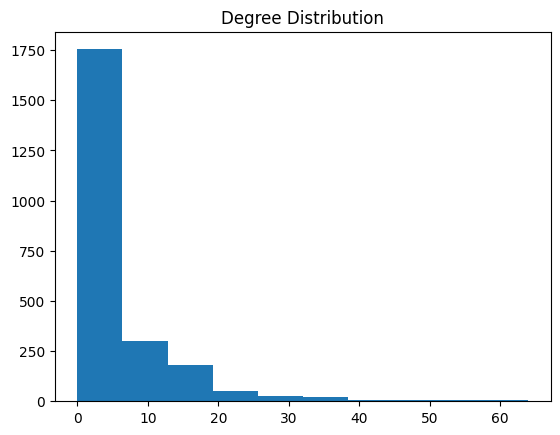

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [203]:
# visualize degree distribution
plt.clf()
plt.hist(list(dict(G.degree()).values()))
plt.title('Degree Distribution')
plt.show()

# visualize the network -- do not run this step if your network is very large with a lot of edges
nx.draw(G, node_size = 30)

In [204]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(
  G,
  dimensions=16
)

mdl = g_emb.fit(
    vector_size = 16,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

Computing transition probabilities:   0%|          | 0/2361 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.25it/s]


In [215]:
X = emb_df.values

clustering = SpectralClustering(
    n_clusters=1111, 
    assign_labels='discretize',
    random_state=0
).fit(X)

In [216]:
#print the clusters
clustering.labels_

array([ 292, 1092,   69, ...,  316,  114,  316], dtype=int64)

In [217]:
#write the clusters to a df
df = pd.DataFrame(columns=['id', 'community'])
for i, community in enumerate(clustering.labels_):
    df = df.append({'id': i+1, 'community': community+1}, ignore_index=True)

In [218]:
df

,id,community
0,1,293
1,2,1093
2,3,70
3,4,93
4,5,374
...,...,...
2356,2357,226
2357,2358,216
2358,2359,317
2359,2360,115


In [219]:
df.to_csv('communities4.csv', index=False)

In [210]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
import matplotlib.pyplot as plt

In [211]:
# Setting packages import
import os
import pandas as pd
import networkx as nx
import community.community_louvain as community
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
from cdlib import algorithms

In [164]:

coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

In [165]:
mod = coms.newman_girvan_modularity()
mod

FitnessResult(min=None, max=None, score=0.6197860868638685, std=None)

In [174]:
print(G)

Graph with 2361 nodes and 6646 edges


In [189]:
import networkx.algorithms.community as community


In [190]:
# Community detection
partition = list(community.greedy_modularity_communities(G, weight='weight'))
dict_node_community = dict()
for community_i in range(len(partition)):
    for node in partition[community_i]:
        dict_node_community[node] = community_i
partition = pd.DataFrame(pd.Series(dict_node_community)).reset_index().sort_values(by='index')[0].values

In [193]:
partition

array([13,  3,  0, ...,  4,  0,  1], dtype=int64)

In [194]:
#map to dictionary node: community
node_communities = {}
for i, community in enumerate(partition):
    node_communities[i+1] = community+1

#print length of node_communities
node_communities

#write the dictionary to a df
df = pd.DataFrame(columns=['id', 'community'])
for node, community in node_communities.items():
    df = df.append({'id': node,
                    'community': community}, ignore_index=True)
    
df

,id,community
0,1,14
1,2,4
2,3,1
3,4,2
4,5,4
...,...,...
2356,2357,6
2357,2358,7
2358,2359,5
2359,2360,1


In [195]:
df.to_csv('communities6.csv', index=False)